# Extract names from transcripts

In [ ]:
!pip install fuzzywuzzy
!pip install transformers

In [ ]:
import pandas as pd

file_path = "data.xlsx"
sheet_name = "paragraphs_dataset"


data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=["Column1",  "Column2", "column3"])
print(data)

                             Column1  \
0                               name   
1      Inge-Juliana Sackmann Christy   
2      Inge-Juliana Sackmann Christy   
3      Inge-Juliana Sackmann Christy   
4      Inge-Juliana Sackmann Christy   
...                              ...   
98175                    Donald Ames   
98176                    Donald Ames   
98177                    Donald Ames   
98178                    Donald Ames   
98179                    Donald Ames   

                                                 Column2  column3  
0                                              paragraph        0  
1                           This is Wednesday, March 20.        1  
2                                              March 20.        2  
3       2019. I’m Cindy Kelly, and I’m in Pasadena, C...        3  
4       Inge-Juliana Sackmann Christy. And should I s...        4  
...                                                  ...      ...  
98175  And now his treatment of people. He 

## Rebuild the name_list from profile data

In [ ]:
name_data = pd.read_excel(file_path, sheet_name="profile_name", usecols=["name"])

In [ ]:
import pandas as pd
last_name_list = last_name_data.tolist()
full_name_list = name_data["name"].tolist()

In [ ]:
cleaned_names = []

for name in name_data["name"]:
    parts = name.split()

    # Remove the abbreviated part
    cleaned_parts = [part for part in parts if len(part) > 2]

    cleaned_name = " ".join(cleaned_parts)
    cleaned_names.append(cleaned_name)
split_names1 = []

for name in name_data["name"]:
    name_parts = name.split()  # Use spaces to split the first name text

    split_names1.extend(name_parts)  # Add the split name part to the new list

new_last_name_list = []

for name in split_names1:
    split_names = name.split()
    new_last_name_list.extend(split_names)


In [ ]:
all_names = new_last_name_list + full_name_list + cleaned_names
print(len(all_names))

67811


In [ ]:
filtered_names = [name for name in all_names if len(name) >= 3 and name != "Jr."]

print(filtered_names)

unique_names = list(set(filtered_names))

#print(unique_names)
print(len(unique_names))
print(len(filtered_names))

## Use string matching to identify which sentences in which paragraphs contain names or name parts from name_list.

In [ ]:
import re


def run(i):
  ids = str(data.iloc[i, 2])
  text = str(data.iloc[i, 1])
  Interviewee = str(data.iloc[i, 0])
  name_list = unique_names


  found_names = []
  sentences = re.split(r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s", text.strip())

  sentence_start_indices = [0] + [sum(len(sentence) for sentence in sentences[:i+1]) for i in range(len(sentences))]
  sentence_end_indices = [sum(len(sentence) for sentence in sentences[:i+1]) for i in range(len(sentences))]

  for name in name_list:
      for sentence_index, sentence in enumerate(sentences):
          if name in sentence:
              name_start = sentence.index(name)
              name_end = name_start + len(name)

              sentence_start = sentence_start_indices[sentence_index]
              sentence_end = sentence_end_indices[sentence_index]
              found_names.append({
                  "Interviewee": Interviewee,
                  "name": name,
                  "matched_name": matched_full_names,
                  "start": name_start,
                  "end": name_end,
                  "sentence_index": sentence_index,
                  "sentence": sentence,
                  "absolute_start": sentence_start + name_start,
                  "absolute_end": sentence_start + name_end,
                  "ParaG":text,
                  "ParaG_id":ids
              })
  return found_names

In [ ]:
res = list()
for i in range(len(data)):
  nresult = run(i)
  res += nresult

df = pd.DataFrame(res, columns=['Interviewee', 'name', 'start', 'end', 'sentence', 'sentence_index', 'absolute_start', 'absolute_end', 'ParaG', 'ParaG_id'])
df

,Interviewee,name,start,end,sentence,sentence_index,absolute_start,absolute_end,ParaG,ParaG_id
0,Inge-Juliana Sackmann Christy,Marc,19,23,"This is Wednesday, March 20.",0,19,23,"This is Wednesday, March 20.",1
1,Inge-Juliana Sackmann Christy,Marc,0,4,March 20.,0,0,4,March 20.,2
2,Inge-Juliana Sackmann Christy,Kelly,10,15,"I’m Cindy Kelly, and I’m in Pasadena, California.",1,15,20,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3
3,Inge-Juliana Sackmann Christy,Chris,35,40,And I’m with Inge-Juliana Sackmann Christy.,2,89,94,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3
4,Inge-Juliana Sackmann Christy,Inge-Juliana,13,25,And I’m with Inge-Juliana Sackmann Christy.,2,67,79,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3
...,...,...,...,...,...,...,...,...,...,...
118840,Donald Ames,Easter,97,103,He was typical of the people from the Universi...,1,129,135,And now his treatment of people. He was typica...,98175
118841,Donald Ames,Easter,95,101,And so his favorites in the laboratories were ...,2,366,372,And now his treatment of people. He was typica...,98175
118842,Donald Ames,.T.,147,150,He was typical of the people from the Universi...,1,179,182,And now his treatment of people. He was typica...,98175
118843,Donald Ames,Seaborg,34,41,"Now you have to remember that, in Seaborg’s gr...",0,34,41,"Now you have to remember that, in Seaborg’s gr...",98176


In [ ]:
file_path = "output5.csv"
df.to_csv(file_path, index=False)

## For each sentence, apply a Named Entity Recognition (NER) method to extract all the names contained in each sentence

In [ ]:
#import pandas as pd

file_path = "data.xlsx"
#sheet_name = "output5"
column_name = "sentence"


data = pd.read_excel(file_path, sheet_name=sheet_name, usecols=["Interviewee", column_name, "sentence_index", "ParaG", "ParaG_id", "name"])


print(data)

                          Interviewee          name  \
0       Inge-Juliana Sackmann Christy          Marc   
1       Inge-Juliana Sackmann Christy          Marc   
2       Inge-Juliana Sackmann Christy         Kelly   
3       Inge-Juliana Sackmann Christy         Chris   
4       Inge-Juliana Sackmann Christy  Inge-Juliana   
...                               ...           ...   
118840                    Donald Ames        Easter   
118841                    Donald Ames        Easter   
118842                    Donald Ames           .T.   
118843                    Donald Ames       Seaborg   
118844                    Donald Ames       Seaborg   

                                                 sentence  sentence_index  \
0                            This is Wednesday, March 20.               0   
1                                               March 20.               0   
2       I’m Cindy Kelly, and I’m in Pasadena, California.               1   
3             And I’m with Inge

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def run(i):
  ParaG_id = data.iloc[i, 5]
  ParaG = data.iloc[i, 4]
  sentence_index =data.iloc[i, 3]
  sentence = data.iloc[i, 2]
  interviewee = data.iloc[i, 0]
  name_extract = data.iloc[i, 1]
  name_information = []
  doc = nlp(sentence)

  person_names = []
  for ent in doc.ents:
      if ent.label_ == "PERSON":
          if name_extract in ent.text and len(ent.text) >= 3:
              person_names.append(ent.text)

  name_information.append((interviewee, name_extract, sentence, sentence_index, ParaG, ParaG_id, person_names, ))

  return name_information

In [ ]:
res = list()
for i in range(len(data)):
  name_list = run(i)
  res += name_list

df1 = pd.DataFrame(res, columns=['Interviewee', 'name_extract', 'Sentence', 'sentence_index', 'ParaG', 'ParaG_id', 'Name'])
df1

,Interviewee,name_extract,Sentence,sentence_index,ParaG,ParaG_id,Name
0,Inge-Juliana Sackmann Christy,Marc,"This is Wednesday, March 20.",0,"This is Wednesday, March 20.",1,[]
1,Inge-Juliana Sackmann Christy,Marc,March 20.,0,March 20.,2,[]
2,Inge-Juliana Sackmann Christy,Kelly,"I’m Cindy Kelly, and I’m in Pasadena, California.",1,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,[Cindy Kelly]
3,Inge-Juliana Sackmann Christy,Chris,And I’m with Inge-Juliana Sackmann Christy.,2,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,[Inge-Juliana Sackmann Christy]
4,Inge-Juliana Sackmann Christy,Inge-Juliana,And I’m with Inge-Juliana Sackmann Christy.,2,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,[Inge-Juliana Sackmann Christy]
...,...,...,...,...,...,...,...
118840,Donald Ames,Easter,He was typical of the people from the Universi...,1,And now his treatment of people. He was typica...,98175,[]
118841,Donald Ames,Easter,And so his favorites in the laboratories were ...,2,And now his treatment of people. He was typica...,98175,[]
118842,Donald Ames,.T.,He was typical of the people from the Universi...,1,And now his treatment of people. He was typica...,98175,[]
118843,Donald Ames,Seaborg,"Now you have to remember that, in Seaborg’s gr...",0,"Now you have to remember that, in Seaborg’s gr...",98176,[]


In [ ]:
df2 = df1.drop_duplicates(subset=('Sentence'))
df3 = df2[df2['Name'].str.len() >= 1]
df3

,Interviewee,name_extract,Sentence,sentence_index,ParaG,ParaG_id,Name
2,Inge-Juliana Sackmann Christy,Kelly,"I’m Cindy Kelly, and I’m in Pasadena, California.",1,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,[Cindy Kelly]
3,Inge-Juliana Sackmann Christy,Chris,And I’m with Inge-Juliana Sackmann Christy.,2,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,[Inge-Juliana Sackmann Christy]
10,Inge-Juliana Sackmann Christy,Chris,Inge-Juliana Sackmann Christy.,0,Inge-Juliana Sackmann Christy. And should I s...,4,[Inge-Juliana Sackmann Christy]
42,Inge-Juliana Sackmann Christy,Joseph,[Adolf] Hitler and [Joseph] Stalin made a pact.,2,The First World War was pretty lousy. Then cam...,15,[Joseph] Stalin]
101,Inge-Juliana Sackmann Christy,Prince,"I thought of going to Princeton, where some of...",6,Because I had such a bitter feeling with Germa...,59,[Princeton]
...,...,...,...,...,...,...,...
118820,Donald Ames,Glenn,The other secretary was to take notes on whate...,2,He had two secretaries. One secretary was for ...,98172,[Glenn Seaborg]
118828,Donald Ames,Lewis,[Gilbert Newton] Lewis out there on acids and ...,3,"Now, as far as his treatment of the people. Be...",98174,[Gilbert Newton] Lewis]
118831,Donald Ames,Lawrence,"He did not work on radioactivity, but he was e...",5,"Now, as far as his treatment of the people. Be...",98174,[Ernest] Lawrence]
118834,Donald Ames,John,[John] J.,8,"Now, as far as his treatment of the people. Be...",98174,[John] J.]


## Use profile data as a reference to correct the name

In [ ]:
import difflib

similarity_threshold = 0.7
top_n_similar_names = 3
replacement_symbol = '*'  # Symbol to indicate the replaced names

def replace_names(names):
    most_similar_names = []
    
    for name in names:
        closest_matches = difflib.get_close_matches(name, name_data['name'], n=top_n_similar_names, cutoff=similarity_threshold)
        if closest_matches:
            most_similar_names.extend(closest_matches)
        else:
            most_similar_names.append(name)

    replaced_names = [f"{replacement_symbol}{name}" if name not in most_similar_names else name for name in names]
    return ', '.join(replaced_names)
df3['Name'] = df3['Name'].apply(replace_names)

<ipython-input-209-6a9fe8930c2e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Name'] = df3['Name'].apply(replace_names)


In [ ]:
df3

,Interviewee,name_extract,Sentence,sentence_index,ParaG,ParaG_id,Name
2,Inge-Juliana Sackmann Christy,Kelly,"I’m Cindy Kelly, and I’m in Pasadena, California.",1,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,*Cindy Kelly
3,Inge-Juliana Sackmann Christy,Chris,And I’m with Inge-Juliana Sackmann Christy.,2,"2019. I’m Cindy Kelly, and I’m in Pasadena, C...",3,Inge-Juliana Sackmann Christy
10,Inge-Juliana Sackmann Christy,Chris,Inge-Juliana Sackmann Christy.,0,Inge-Juliana Sackmann Christy. And should I s...,4,Inge-Juliana Sackmann Christy
42,Inge-Juliana Sackmann Christy,Joseph,[Adolf] Hitler and [Joseph] Stalin made a pact.,2,The First World War was pretty lousy. Then cam...,15,*Joseph] Stalin
101,Inge-Juliana Sackmann Christy,Prince,"I thought of going to Princeton, where some of...",6,Because I had such a bitter feeling with Germa...,59,*Princeton
...,...,...,...,...,...,...,...
118820,Donald Ames,Glenn,The other secretary was to take notes on whate...,2,He had two secretaries. One secretary was for ...,98172,Glenn Seaborg
118828,Donald Ames,Lewis,[Gilbert Newton] Lewis out there on acids and ...,3,"Now, as far as his treatment of the people. Be...",98174,*Gilbert Newton] Lewis
118831,Donald Ames,Lawrence,"He did not work on radioactivity, but he was e...",5,"Now, as far as his treatment of the people. Be...",98174,*Ernest] Lawrence
118834,Donald Ames,John,[John] J.,8,"Now, as far as his treatment of the people. Be...",98174,*John] J.


In [ ]:
def find_most_similar_name(name, name_list):
    most_similar_name = difflib.get_close_matches(name, name_data, n=1)
    if most_similar_name:
        return most_similar_name[0]
    else:
        return name


df3['Name'] = df3['Name'].apply(lambda x: find_most_similar_name(x, name_data))
print(df3)


                          Interviewee name_extract  \
2       Inge-Juliana Sackmann Christy        Kelly   
3       Inge-Juliana Sackmann Christy        Chris   
10      Inge-Juliana Sackmann Christy        Chris   
42      Inge-Juliana Sackmann Christy       Joseph   
101     Inge-Juliana Sackmann Christy       Prince   
...                               ...          ...   
118820                    Donald Ames        Glenn   
118828                    Donald Ames        Lewis   
118831                    Donald Ames     Lawrence   
118834                    Donald Ames         John   
118837                    Donald Ames       Prince   

                                                 Sentence  sentence_index  \
2       I’m Cindy Kelly, and I’m in Pasadena, California.               1   
3             And I’m with Inge-Juliana Sackmann Christy.               2   
10                         Inge-Juliana Sackmann Christy.               0   
42        [Adolf] Hitler and [Joseph] Stali

<ipython-input-142-98338123f507>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Name'] = df3['Name'].apply(lambda x: find_most_similar_name(x, name_data))


## Clean the names data

In [ ]:
#import pandas as pd
#file_path = "extracted_names_paragraph.xlsx"
#data = pd.read_excel(file_path, usecols=["interviewee",  "sentence", "sentence_index", "paragraph", "paragraph_index", "name_extracted"])

#print(data)

In [ ]:
data['Name_Count'] = data['name_extracted'].str.count(',') + 1
df_sorted = data.sort_values('Name_Count', ascending=False)
print(df_sorted[['name_extracted', 'Name_Count']])

In [ ]:
import difflib

def keep_longest_name(names):
    name_list = [name.strip() for name in names.split(',')]
    longest_name = max(name_list, key=len)
    for name in name_list:
        if difflib.SequenceMatcher(None, longest_name, name).ratio() >= 0.9:
            return longest_name
    return names

data['Name_Extracted_Cleaned'] = data['name_extracted'].apply(keep_longest_name)

data['Name_Count'] = data['Name_Extracted_Cleaned'].str.count(',') + 1

df_sorted = data.sort_values('Name_Count', ascending=False)

print(df_sorted[['Name_Extracted_Cleaned', 'Name_Count']])

In [ ]:
df1 = data.sort_values('Name_Count', ascending=False)

print(df1[['name_extracted', 'Name_Count']])

In [ ]:
df1['Name_Extracted_Cleaned'] = df1['Name_Extracted_Cleaned'].str.replace(r'\[|\]|\s', '').str.strip('. ')
df1['Name_Extracted_Cleaned'] = df1['Name_Extracted_Cleaned'].str.replace("'", "")
df1['Num_Apostrophes'] = df1['Name_Extracted_Cleaned'].str.count("'")
#df1 = df1.drop(['Apostrophe_Count', 'Num_Apostrophes'], axis=1)


<ipython-input-22-0e8a0e43de15>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Name_Extracted_Cleaned'] = df1['Name_Extracted_Cleaned'].str.replace(r'\[|\]|\s', '').str.strip('. ')


In [ ]:
import re
pattern = r"(’|’s|n’t)"

error_rows = df1[df1['Name_Extracted_Cleaned'].str.contains(pattern, regex=True)]
print(error_rows)

In [ ]:
import re
pattern = r"(’|'s|n't)"
for index, row in df1.iterrows():
    name = row['Name_Extracted_Cleaned']
    corrected_name = re.sub(pattern, '', name)
    
    df1.at[index, 'Name_Extracted_Cleaned'] = corrected_name

In [ ]:
file_path = "df1.csv"
df1.to_csv(file_path, index=False)

In [ ]:
filtered_df = df1[df1['paragraph_index'] == 91849]
filtered_df

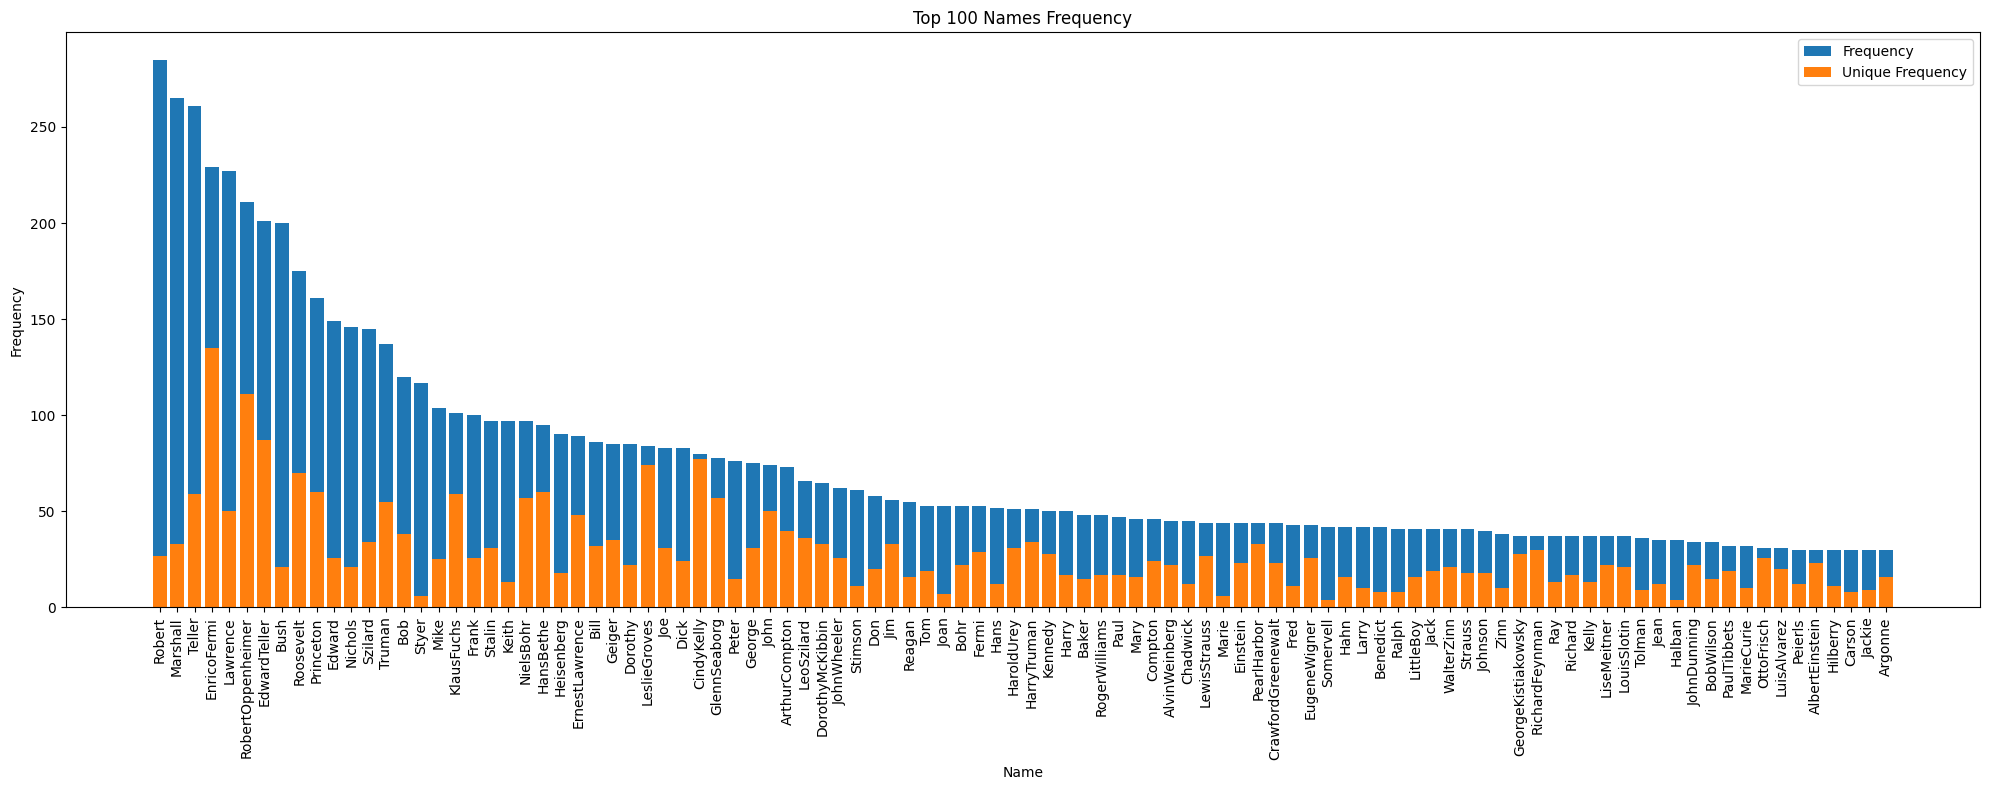

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

names = df1['Name_Extracted_Cleaned'].str.split(',').explode().str.strip()
name_freq_all = names.value_counts()

top_100_names = name_freq_all.nlargest(100).index.tolist()
top_100_df = pd.DataFrame({'Name': top_100_names})
top_100_df['Frequency'] = top_100_df['Name'].map(name_freq_all)

name_freq_unique = df1.groupby('Name_Extracted_Cleaned')['interviewee'].nunique()
top_100_df['Frequency_unique'] = top_100_df['Name'].map(name_freq_unique).fillna(1)

plt.figure(figsize=(20, 8))
plt.bar(top_100_df['Name'], top_100_df['Frequency'], label='Frequency')
plt.bar(top_100_df['Name'], top_100_df['Frequency_unique'], label='Unique Frequency')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 100 Names Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
name_freq_unique = df1.groupby('Name_Extracted_Cleaned')['interviewee'].nunique()
name_freq_unique.sort_values(ascending=False, inplace=True)
print(name_freq_unique)

Name_Extracted_Cleaned
EnricoFermi          135
RobertOppenheimer    111
EdwardTeller          87
CindyKelly            77
LeslieGroves          74
                    ... 
HarrisonBegay          1
HarrisMayer            1
HarrisHaroldLevee      1
HarrietMonroe          1
JohnFerguson           1
Name: interviewee, Length: 5470, dtype: int64


In [ ]:
df_merged = df1.merge(name_freq_unique, on='Name_Extracted_Cleaned', how='left')
df_merged.rename(columns={'frequency': 'frequency2'}, inplace=True)
#df_merged = df_merged.drop(['frequency2'], axis=1)
df_merged.rename(columns={'interviewee_y': 'frequency2'}, inplace=True)
df_merged

In [ ]:
file_path = "data_merged.csv"
df_merged.to_csv(file_path, index=False)

In [ ]:
All_names = name_freq_all.nlargest(5470).index.tolist()

In [ ]:
sum_of_top_300 = df_merged['frequency1'].head(300).sum()
print("Sum of top 300 frequencies1:", sum_of_top_300)


Sum of top 300 frequencies: 27757


## Entity disambiguation (grouped the data)

In [ ]:
df_merged1 = df_merged
df_merged1

In [ ]:
set_A = set(df_merged['Name_Extracted_Cleaned'])


for name in All_names:
    related_names = [n for n in set_A if name in n]
    print(f"related to {name}：")
    for related_name in related_names:
        print(related_name)
    print()




In [ ]:
import pandas as pd

df_allnames = pd.DataFrame(columns=['Name', 'Related_Names'])

for name in All_names:
    related_names = [n for n in set_A if name in n]
    df_allnames = pd.concat([df_allnames, pd.DataFrame({'Name': [name], 'Related_Names': [related_names]})], ignore_index=True)

print(df_allnames)



In [ ]:
related_names = df_allnames[df_allnames['Name'] == 'Robert']['Related_Names'].values[0]
print(related_names)


In [ ]:
import pandas as pd
import numpy as np

for index, row in df_allnames.iterrows():
    name = row['Name']
    related_names = row['Related_Names'] 
    
    mask = df_merged['Name_Extracted_Cleaned'] == name
    df_temp = df_merged[mask]
    
    interviewees = df_temp['interviewee_x'].unique()
    
    for interviewee in interviewees:
        mask = (df_merged['interviewee_x'] == interviewee) & (df_merged['Name_Extracted_Cleaned'].isin(related_names))
        df_related = df_merged[mask]
        
        for related_name in df_related['Name_Extracted_Cleaned'].unique():
            print(f"Name: {name}, Interviewee: {interviewee}, Related Name: {related_name}")
        
        for _, row_to_replace in df_temp[df_temp['interviewee_x'] == interviewee].iterrows():
            closest_related_name = None
            min_diff = np.inf
            min_sentence_diff = np.inf
            max_length = 0

            for related_name in df_related['Name_Extracted_Cleaned'].unique():
                if related_name == name:
                    continue
                
                related_name_rows = df_related[df_related['Name_Extracted_Cleaned'] == related_name]
                diff = abs(related_name_rows['paragraph_index'] - row_to_replace['paragraph_index']).min()
                
                if diff == 0: 
                    sentence_diff = abs(related_name_rows['sentence_index'] - row_to_replace['sentence_index']).min()
                    
                    if sentence_diff < min_sentence_diff:
                        min_diff = diff
                        min_sentence_diff = sentence_diff
                        closest_related_name = related_name
                elif diff < min_diff: 
                    min_diff = diff
                    min_sentence_diff = np.inf
                    closest_related_name = related_name
                elif diff == min_diff: 
                    if len(related_name) > max_length: 
                        min_diff = diff
                        min_sentence_diff = np.inf
                        max_length = len(related_name)
                        closest_related_name = related_name

            mask = (df_merged['Name_Extracted_Cleaned'] == name) & (df_merged['interviewee_x'] == interviewee) & (df_merged.index == row_to_replace.name)
            df_merged.loc[mask, 'Name_Extracted_Cleaned'] = closest_related_name



In [ ]:
file_path = "Names.xlsx"
df_merged1 = pd.read_excel(file_path, sheet_name = "data_merged1", usecols=["interviewee_x",  "sentence", "paragraph", "paragraph_index", "Name_Extracted_Cleaned" ])
print(df_merged1)

In [ ]:
import pandas as pd

df_merged1['Name_Without_Last'] = df_merged1['Name_Extracted_Cleaned'].str[:-1]

mask = (df_merged1['Name_Extracted_Cleaned'].str.endswith('s')) & (df_merged1['Name_Without_Last'].isin(df_merged1['Name_Extracted_Cleaned']))

df_merged1.loc[mask, 'Name_Extracted_Cleaned'] = df_merged1.loc[mask, 'Name_Without_Last']

df_merged1 = df_merged1.drop('Name_Without_Last', axis=1)

In [ ]:
file_path = "data_merged1.csv"
df_merged1.to_csv(file_path, index=False)

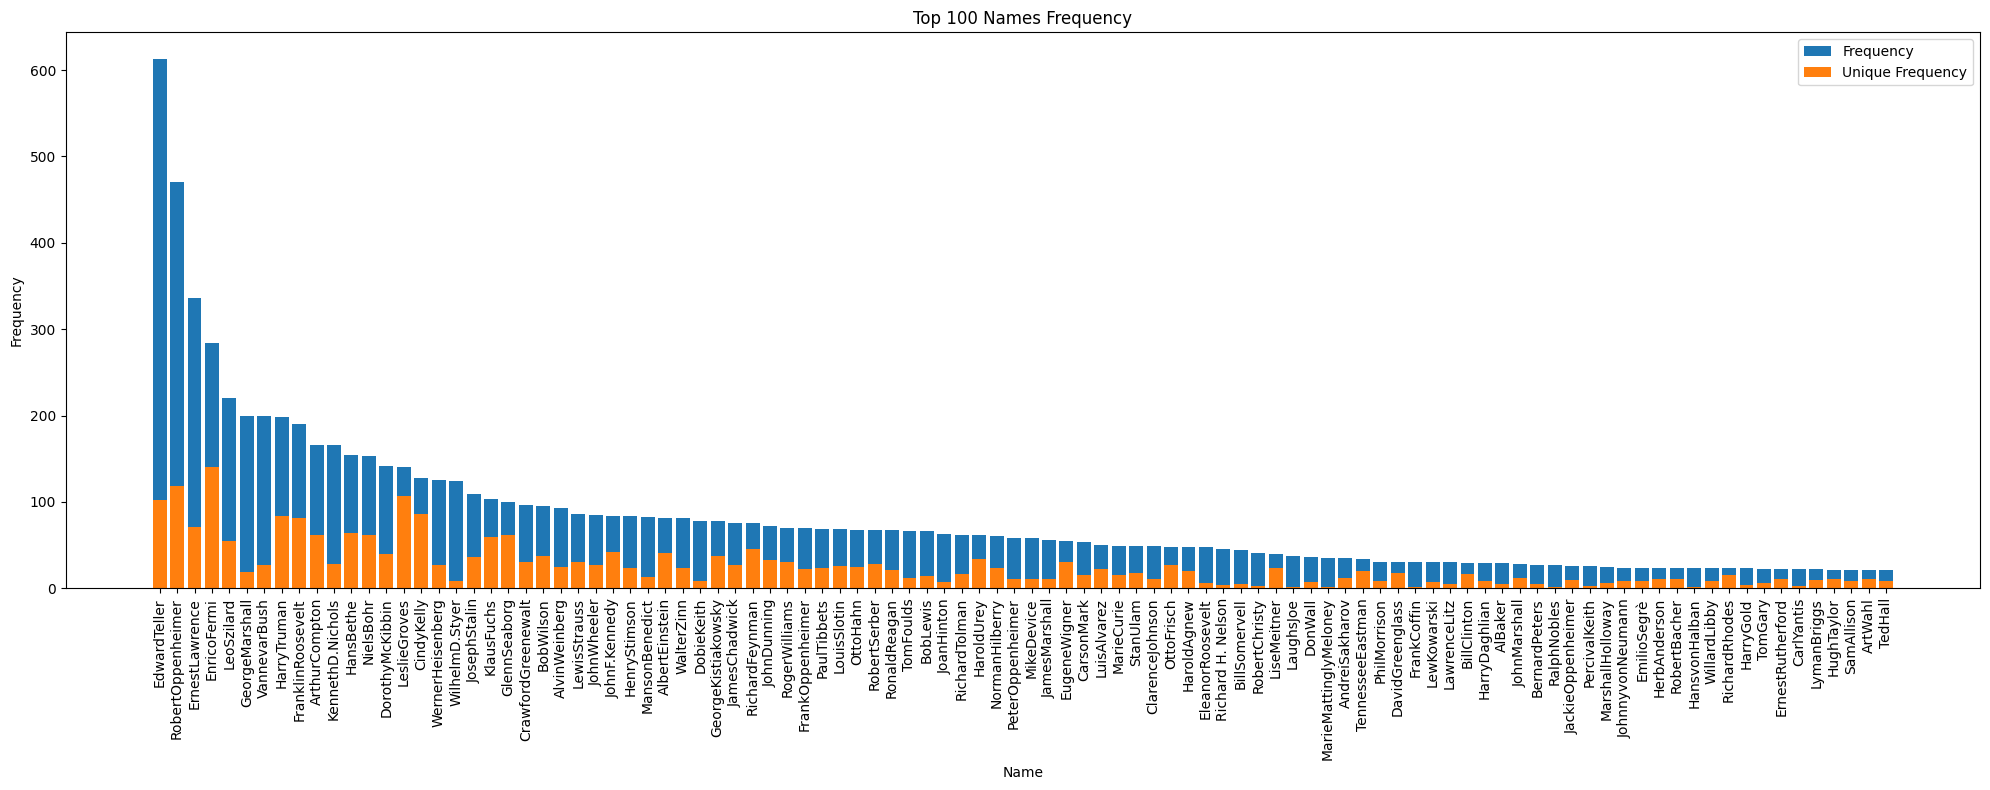

In [ ]:
import matplotlib.pyplot as plt

names = df_merged1['Name_Extracted_Cleaned'].str.split(',').explode().str.strip()
name_freq_all = names.value_counts()

top_100_names = name_freq_all.nlargest(100).index.tolist()
top_100_df = pd.DataFrame({'Name': top_100_names})
top_100_df['Frequency'] = top_100_df['Name'].map(name_freq_all)

name_freq_unique = df_merged1.groupby('Name_Extracted_Cleaned')['interviewee_x'].nunique()
top_100_df['Frequency_unique'] = top_100_df['Name'].map(name_freq_unique).fillna(1)

plt.figure(figsize=(20, 8))
plt.bar(top_100_df['Name'], top_100_df['Frequency'], label='Frequency')
plt.bar(top_100_df['Name'], top_100_df['Frequency_unique'], label='Unique Frequency')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 100 Names Frequency')
plt.legend()
plt.tight_layout()
plt.show()

## After manually processing

In [ ]:
#import pandas as pd
file_path = "Names.xlsx"
df_merged1 = pd.read_excel(file_path, sheet_name = "name_grouped_top50", usecols=["interviewee_x",  "sentence", "paragraph", "paragraph_index", "Name_Extracted_Cleaned" ])
print(df_merged1)

                      interviewee_x  \
0                    Lydia Martinez   
1               Marshall Rosenbluth   
2               Marshall Rosenbluth   
3               Marshall Rosenbluth   
4               Marshall Rosenbluth   
...                             ...   
19912  Ronald E. Mickens’ Interview   
19913  Ronald E. Mickens’ Interview   
19914                     Zane Bell   
19915  Ronald E. Mickens’ Interview   
19916              Louis Hempelmann   

                                                sentence  \
0      The Tellers [Edward and Mici], I went  and bab...   
1         I supposed Teller was always pretty messianic.   
2      I never understood why Teller wanted to form t...   
3      I guess one thing Teller always provided, prob...   
4      Well, I have to say when one reads the chronic...   
...                                                  ...   
19912          You got Virginia State, you have Norfolk.   
19913  There’s a fellow who was at the University o

In [ ]:
import pandas as pd

df_merged1['Name_Without_Last'] = df_merged1['Name_Extracted_Cleaned'].str[:-1]

mask = (df_merged1['Name_Extracted_Cleaned'].str.endswith('s')) & (df_merged1['Name_Without_Last'].isin(df_merged1['Name_Extracted_Cleaned']))

df_merged1.loc[mask, 'Name_Extracted_Cleaned'] = df_merged1.loc[mask, 'Name_Without_Last']

df_merged1 = df_merged1.drop('Name_Without_Last', axis=1)

In [ ]:
file_path = "data_merged1.csv"
df_merged1.to_csv(file_path, index=False)

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

names = df_merged1['Name_Extracted_Cleaned'].str.split(',').explode().str.strip()
name_freq_all = names.value_counts()

top_100_names = name_freq_all.nlargest(100).index.tolist()
top_100_df = pd.DataFrame({'Name': top_100_names})
top_100_df['Frequency'] = top_100_df['Name'].map(name_freq_all)

name_freq_unique = df_merged1.groupby('Name_Extracted_Cleaned')['interviewee_x'].nunique()
top_100_df['Frequency_unique'] = top_100_df['Name'].map(name_freq_unique).fillna(1)

plt.figure(figsize=(20, 8))
plt.bar(top_100_df['Name'], top_100_df['Frequency'], label='Frequency')
plt.bar(top_100_df['Name'], top_100_df['Frequency_unique'], label='Unique Frequency')
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.title('Top 100 Names Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
name_counts = df_merged1['Name_Extracted_Cleaned'].value_counts()
name_ranks = name_counts.rank(method='min', ascending=False).astype(int)

df_merged1['Name_group_index'] = df_merged1['Name_Extracted_Cleaned'].map(name_ranks)

df_merged1.sort_values(by='Name_Extracted_Cleaned', key=lambda col: col.map(name_counts), ascending=False, inplace=True)

In [ ]:
df_merged1['frequency'] = df_merged1['Name_Extracted_Cleaned'].map(name_counts)

In [ ]:
file_path = "name_data.csv"
df_merged1.to_csv(file_path, index=False)

In [ ]:
unique_values = df_merged1['Name_Extracted_Cleaned'].nunique()
print("Number of unique values:", unique_values)


Number of unique values: 5086
